In [14]:
import numpy as np
import torch
import cv2

In [15]:
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("cuDNN version:", torch.backends.cudnn.version())

PyTorch version: 1.4.0
CUDA version: 10.0
cuDNN version: 7603


In [16]:
gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
gpu

device(type='cpu')

In [17]:
from blazeFacemark import BlazeFacemark

net = BlazeFacemark().to(gpu)
net.load_weights("blazeFacemark.pth")

In [27]:
img = cv2.imread("facesample3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [28]:
img.shape

(474, 474, 3)

In [29]:
img = cv2.resize(img, (192, 192))

In [30]:
detections, score = net.predict_on_image(img)
detections.shape

torch.Size([1, 1, 1, 1404])

In [31]:
if isinstance(detections, torch.Tensor):
        detections = detections.cpu().numpy()

In [32]:
detections = detections.reshape(-1,3)

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

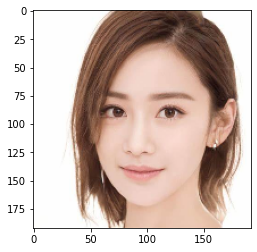

In [34]:
plt.imshow(img)

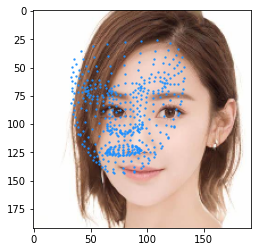

In [35]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.scatter(detections[:, 0], detections[:, 1], color ='dodgerblue', alpha=0.8, s = 2)